# Linear Threshold Model - Quickstart


In [1]:
# import the LTM library and some utilities
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import linear_threshold_model as ltm
help(ltm)

Help on module linear_threshold_model:

NAME
    linear_threshold_model - This module contains functions for setting up and running cascades on networks, creating and manipulating adjacency matrices, and generating truth tables for Boolean functions. It also includes functions for plotting and visualizing network structures.

DESCRIPTION
    The module is organized into sections for different types of functions, including setup functions for different types of networks, functions for running cascades on these networks, and functions for generating and manipulating truth tables. Additionally, there are utility functions for converting between different data representations and for setting up random seeds for reproducibility.
    
    The module makes use of several external libraries, including NumPy, SciPy, NetworkX, Matplotlib, Pandas, Seaborn, Networkit, and Pynauty. Some functions are designed to work with specific types of networks, such as random geometric graphs, and others are m

# A few examples

## Run a single LTM cascade

### setup the LTM model, set a seed node, and draw it

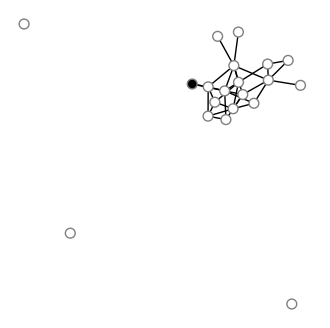

In [28]:
N = 20 # number of nodes

# connection probability
# p = 0.5 

# if you prefer instead mean degree z, use this:
z = 3
p = z / (N-1)

theta = 0 # fraction of antagonistic nodes.  0 = only 'excitatory' nodes

# whether the node thresholds are random (phi = None) uniform in [0,1], 
# or all some fixed value
phi_constant=None 
# phi_constant = 0.1  #sets all thresholds to 0.1

# the state of the first few nodes in the network
# [1] will set node 0 to 'on'
# [1,1] will set nodes 0 and 1 to 'on'
seed_nodes = [1] 

# setup the LTM model
adjacency_matrix, node_states, phi_vector, node_types, degree_vector = \
ltm.setup_non_vectorized_ALTM(N, p, theta, phi_constant)

# perturb the network by setting some seed nodes
node_states = ltm.set_seed_nodes(N, seed_nodes)  # here we just set node zero to 'on'

# draw the network, while obtaining the networkx graph object and node positions
G, pos = ltm.draw_network(adjacency_matrix,node_states, with_labels = False)

### Run the cascade, obtaining the final node states

In [29]:
node_states = ltm.run_non_vectorized_ALTM_cascade(adjacency_matrix,
                                                  node_states,
                                                  phi_vector,
                                                  degree_vector,
                                                  node_types,
                                                  verbose=False)

### Draw the resulting network with node states

cascade size 0.15


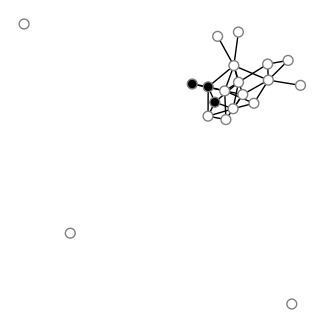

In [30]:
# draw the network, while obtaining the networkx graph object and node positions
# pass in the old pos to fix node positions
G, pos = ltm.draw_network(adjacency_matrix,node_states, position=pos) 

# get the cascade size (fraction of network activated after the cascade has completed)
print('cascade size', ltm.cascade_size(node_states))

## Run multiple Monte Carlo cascade trials over a range of mean degree $z$ values
## plot the results

cascade sizes array (10, 80)


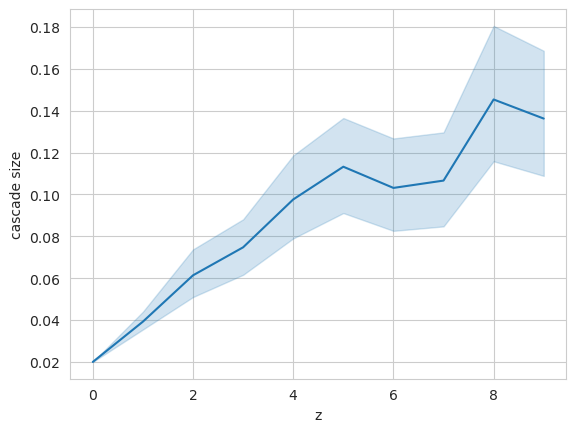

In [33]:
N = 100
k = 2
z_range = np.arange(0,10)
num_trials = 80
verbose = False

cascade_sizes = ltm.run_cascade_trials(N,num_trials,z_range,k)

# |z_range| x num_trials array of node activations 
print('cascade sizes array', cascade_sizes.shape)

# plot cascade sizes with confidence interval
ltm.plot_with_confidence_interval(cascade_sizes, z_range)